In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [3]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

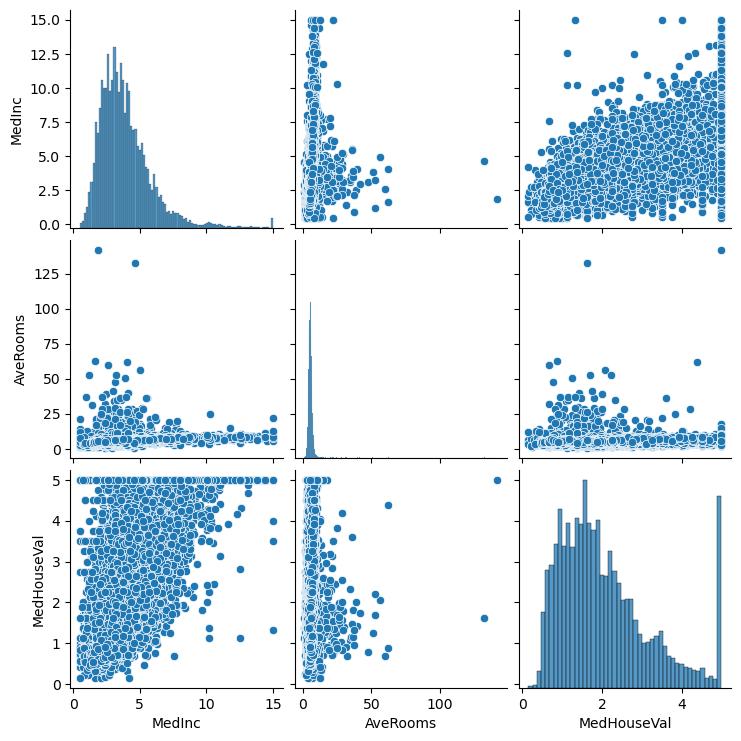

In [5]:
sns.pairplot(df[['MedInc', 'AveRooms', 'MedHouseVal']])
plt.show()

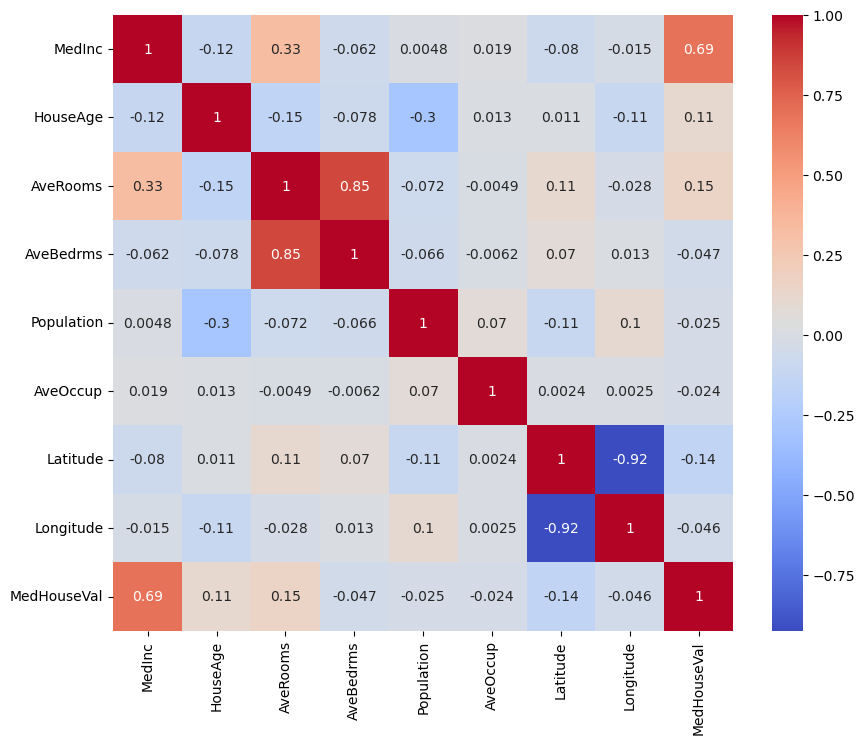

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
X = df[['MedInc', 'AveRooms']].values
y = df['MedHouseVal'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [11]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

In [12]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_train_pred_linear = model_linear.predict(X_train_scaled)
y_test_pred_linear = model_linear.predict(X_test_scaled)

In [13]:
model_tree = DecisionTreeRegressor(random_state=0)
model_tree.fit(X_train_scaled, y_train)
y_train_pred_tree = model_tree.predict(X_train_scaled)
y_test_pred_tree = model_tree.predict(X_test_scaled)

In [14]:
def print_metrics(y_train, y_train_pred, y_test, y_test_pred, model_name):
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f'{model_name} Training Mean Squared Error: {train_mse}')
    print(f'{model_name} Test Mean Squared Error: {test_mse}')
    print(f'{model_name} Training R² Score: {train_r2}')
    print(f'{model_name} Test R² Score: {test_r2}')

In [15]:
print_metrics(y_train, y_train_pred_poly, y_test, y_test_pred_poly, "Polynomial Regression")

Polynomial Regression Training Mean Squared Error: 0.6655213598802162
Polynomial Regression Test Mean Squared Error: 0.6943082191575729
Polynomial Regression Training R² Score: 0.5027379470639275
Polynomial Regression Test R² Score: 0.46753663188424766


In [16]:
print_metrics(y_train, y_train_pred_linear, y_test, y_test_pred_linear, "Linear Regression")

Linear Regression Training Mean Squared Error: 0.6890305711895538
Linear Regression Test Mean Squared Error: 0.7101927490883555
Linear Regression Training R² Score: 0.4851724121565383
Linear Regression Test R² Score: 0.4553548226034325


In [17]:
print_metrics(y_train, y_train_pred_tree, y_test, y_test_pred_tree, "Decision Tree Regression")

Decision Tree Regression Training Mean Squared Error: 4.767945635965176e-32
Decision Tree Regression Test Mean Squared Error: 1.2301038142982559
Decision Tree Regression Training R² Score: 1.0
Decision Tree Regression Test R² Score: 0.05663622866513307


In [18]:
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [19]:
best_tree_model = grid_search.best_estimator_
y_train_pred_best_tree = best_tree_model.predict(X_train_scaled)
y_test_pred_best_tree = best_tree_model.predict(X_test_scaled)

In [20]:
print_metrics(y_train, y_train_pred_best_tree, y_test, y_test_pred_best_tree, "Tuned Decision Tree Regression")

Tuned Decision Tree Regression Training Mean Squared Error: 0.6020840464563606
Tuned Decision Tree Regression Test Mean Squared Error: 0.6319689164691771
Tuned Decision Tree Regression Training R² Score: 0.5501368295153836
Tuned Decision Tree Regression Test R² Score: 0.5153444989950897


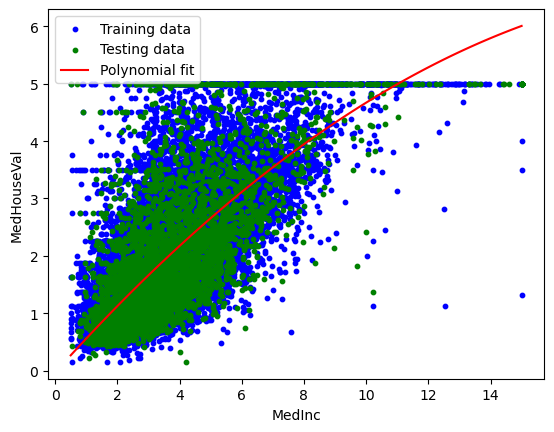

In [21]:
plt.scatter(X_train[:, 0], y_train, color='blue', s=10, label='Training data')
plt.scatter(X_test[:, 0], y_test, color='green', s=10, label='Testing data')

MedInc_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
AveRooms_mean = np.mean(X[:, 1]) * np.ones_like(MedInc_range)
X_range = np.hstack((MedInc_range, AveRooms_mean))

X_range_scaled = scaler.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = model_poly.predict(X_range_poly)

plt.plot(MedInc_range, y_range_pred, color='red', label='Polynomial fit')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()